In [1]:
# Sets project folder as working directory ('.../My Drive/Colab Notebooks/cifar10_classification_autoencoder)
import sys
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab \Notebooks/cifar10_classification_autoencoder
!pwd
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder/cifar10_modules/')
!pip install matplotlib==3.1.0

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
     |████████████████████████████████| 13.1MB 2.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [2]:
# Developed modules
from dataset import *
from modelling5 import *

Using TensorFlow backend.


In [0]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [0]:
set_random_seeds(42)

In [8]:
x_train, x_val, x_test, y_train, y_val, y_test, class_names= load_and_norm(0.22)

170500096/170498071 [==============================] - 3s 0us/step
Normalized by the maximum value of training set
Normalized by the maximum value of training set
Normalized by the maximum value of training set
**Training data**
Number of samples: 33150
airplane : 3910
automobile : 3891
bird : 1944
cat : 3874
deer : 1981
dog : 3913
frog : 3894
horse : 3889
ship : 3905
truck : 1949

**Validation data**
Number of samples: 9350
airplane : 1090
automobile : 1109
bird : 556
cat : 1126
deer : 519
dog : 1087
frog : 1106
horse : 1111
ship : 1095
truck : 551

**Test data**
Number of samples: 10000
airplane : 1000
automobile : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0        

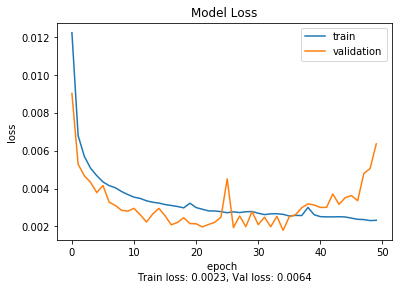

In [9]:
#Train autoencoder
autoencoder_config= load_config('autoencoder_config_base.json')
autoencoder_config['conv_blocks'] = 3
autoencoder_config['batch_size'] = 64
autoencoder_config['epochs'] = 50
autoencoder_config['optimizer'] = 'adam'
autoencoder_config['lr'] = 0.001
autoencoder_config['batch_norm'] = True
autoencoder_config['dropout'] = True
autoencoder_config['dropout_value'] = 0.2
autoencoder_filename= 'autoencoder_5m_adam_50epochs_3blocks_02dropout'
save_config(autoencoder_config,'autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
autoencoder= train_autoencoder(x_train, x_val, autoencoder_config, autoencoder_filename,encoder_filename)

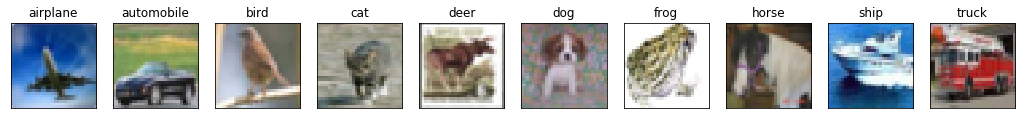

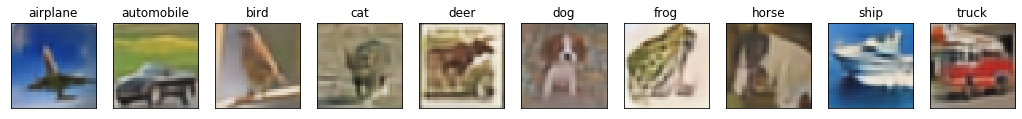

In [10]:
autoencoder=load_saved_model(autoencoder_filename)
x_pred= autoencoder.predict(x_val)
image_list= random_images(y_val, class_names)
show_image_list(x_val,y_val,class_names,image_list)
show_image_list(x_pred,y_val,class_names,image_list)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0   

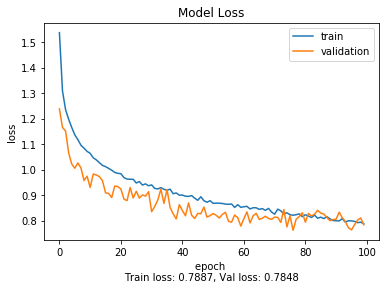

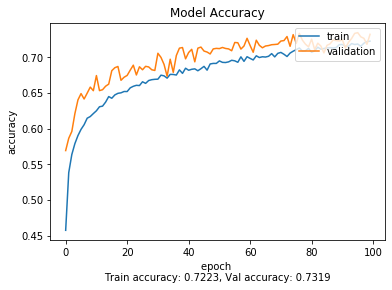

In [0]:
# Train classifier
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['data_augmentation']= True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_data_augmentation_100epochs_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




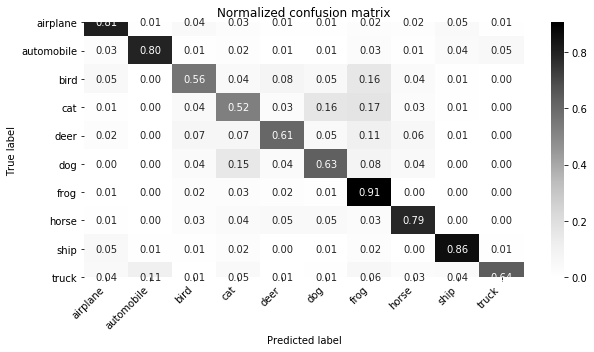


              precision    recall  f1-score   support

    airplane       0.82      0.81      0.82      1090
  automobile       0.91      0.80      0.85      1109
        bird       0.55      0.56      0.56       556
         cat       0.59      0.52      0.56      1126
        deer       0.59      0.61      0.60       519
         dog       0.67      0.63      0.65      1087
        frog       0.63      0.91      0.74      1106
       horse       0.82      0.79      0.81      1111
        ship       0.86      0.86      0.86      1095
       truck       0.81      0.64      0.71       551

    accuracy                           0.73      9350
   macro avg       0.73      0.71      0.71      9350
weighted avg       0.74      0.73      0.73      9350



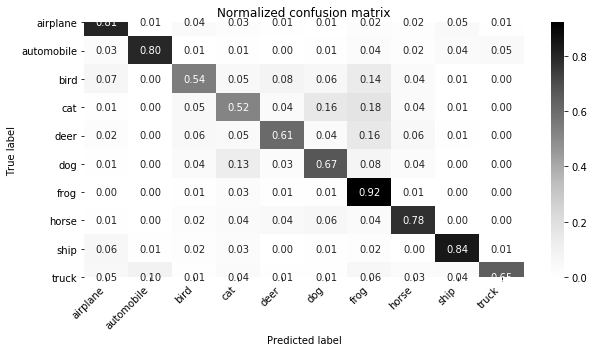


              precision    recall  f1-score   support

    airplane       0.74      0.81      0.78      1000
  automobile       0.86      0.80      0.83      1000
        bird       0.69      0.54      0.60      1000
         cat       0.56      0.52      0.54      1000
        deer       0.72      0.61      0.66      1000
         dog       0.65      0.67      0.66      1000
        frog       0.56      0.92      0.69      1000
       horse       0.76      0.78      0.77      1000
        ship       0.85      0.84      0.84      1000
       truck       0.89      0.65      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



In [0]:
# Confusion matrix and classification report for validation and test data 
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)
y_pred= classifier_predict_evaluate(x_test, y_test, classifier, class_names)